In [1]:
from numba import jit
from time import time
import math as m 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import os
from scipy.signal import fftconvolve

$$\frac{1}{n\sigma_X \sigma_Y}\sum_{t=1}^{n-\tau}(X_{t+\tau}-\mu_X)(Y_{t}-\mu_Y)$$

if $\tau$ is negative it is made negative again so cch displays symmetric graph. If one array is smaller than the other, just like in matlab function crosscorr, it appends zeroes to that array so both are length $n$.

In [2]:
def cch(tau,X,Y):
    sigma_x,sigma_y = np.std(X),np.std(Y)
    mu_x,mu_y = np.mean(X),np.mean(Y)
    if tau <0:
        tau=-tau
        return np.sum((Y[tau:]-mu_y)*(X[:len(Y)-tau]-mu_x))/(len(Y)*sigma_x*sigma_y)
    if len(X) > len(Y):
        Y = np.hstack((Y,np.zeros(len(X)-len(Y))))
    elif len(Y) > len(X):
        X = np.hstack((X,np.zeros(len(Y)-len(X))))
    if tau >=0:
        return np.sum((X[tau:]-mu_x)*(Y[:len(Y)-tau]-mu_y))/(len(Y)*sigma_x*sigma_y)
 
def cch_plotter(X,Y):
    cchlist = []
    t = np.arange(-len(X)+1,len(X))
    for i in t:
        cchlist.append(cch(i,X,Y))
    cchlist = np.asarray(cchlist)
    return plt.plot(t,cchlist)

def crosscorr(X,Y):
    sigma_x,sigma_y = np.std(X),np.std(Y)
    mu_x,mu_y = np.mean(X),np.mean(Y)
    return np.correlate((X-mu_x),(Y-mu_y),'full')/(len(Y)*sigma_y*sigma_x) # give it 'full'

def fftcrosscorr(X,Y):
    sigma_x,sigma_y = np.std(X),np.std(Y)
    mu_x,mu_y = np.mean(X),np.mean(Y)
    return fftconvolve((X-mu_x),(Y-mu_y)[::-1],'full')/(len(Y)*sigma_y*sigma_x)

In [3]:
X = np.array([1,2,3,4,5])
Y = np.array([1,4,9,16,25])
[cch(i,X,Y) for i in np.arange(-4,5)], crosscorr(X,Y)

([-0.45784895811740994,
  -0.3924419641006371,
  -0.01635174850419321,
  0.49055245512579637,
  0.9811049102515927,
  0.2943314730754778,
  -0.17986923354612533,
  -0.3924419641006371,
  -0.32703497008386423],
 array([-0.45784896, -0.39244196, -0.01635175,  0.49055246,  0.98110491,
         0.29433147, -0.17986923, -0.39244196, -0.32703497]))

In [7]:
fftcrosscorr(X,Y)

array([-0.45784896, -0.39244196, -0.01635175,  0.49055246,  0.98110491,
        0.29433147, -0.17986923, -0.39244196, -0.32703497])

In [106]:
cch(0,X,Y),crosscorr(X,Y)[len(X)-1] # gives cch at lag zero

(0.9811049102515927, 0.9811049102515926)

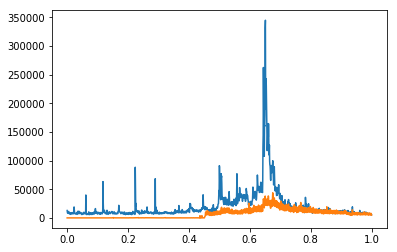

In [3]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/bitcoinvblockchain.csv'))
bitcoin = np.asarray(time_series['Bitcoin'])
blockchain = np.asarray(time_series['Blockchain'])
plt.plot(np.linspace(0,1,len(bitcoin)),bitcoin)
plt.plot(np.linspace(0,1,len(blockchain)),blockchain)

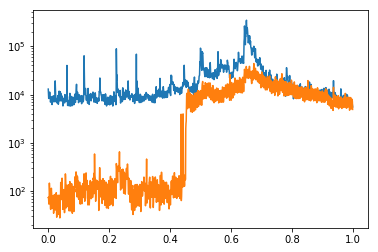

In [4]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/bitcoinvblockchain.csv'))
bitcoin = np.asarray(time_series['Bitcoin'])
blockchain = np.asarray(time_series['Blockchain'])
plt.plot(np.linspace(0,1,len(bitcoin)),bitcoin)
plt.plot(np.linspace(0,1,len(blockchain)),blockchain)
plt.yscale('log')

0.5149719715118408

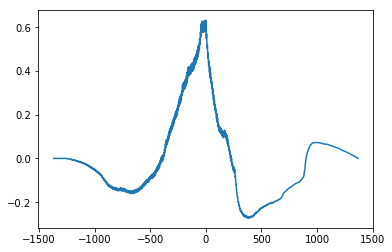

In [5]:
start = time()
cch_plotter(bitcoin,blockchain)
end = time()
end-start

0.026942968368530273

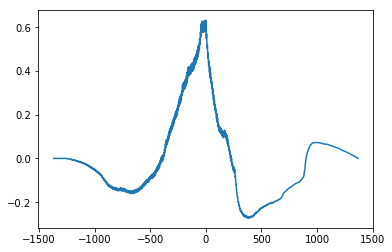

In [6]:
start = time()
length = len(bitcoin)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(bitcoin,blockchain))
end = time()
end-start

0.08596992492675781

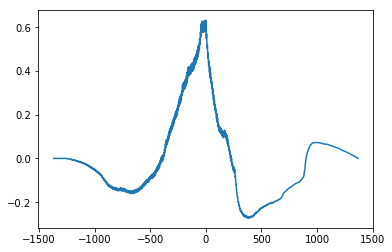

In [7]:
start = time()
length = len(bitcoin)
t = np.arange(-length+1,length)
plt.plot(t,fftcrosscorr(bitcoin,blockchain))
end = time()
end-start

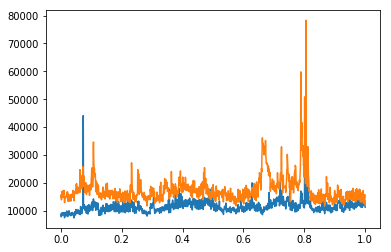

In [8]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/russiavsovietunion.csv'))
russia = np.asarray(time_series['Russia'])
sovietunion = np.asarray(time_series['Soviet Union'])
plt.plot(np.linspace(0,1,len(sovietunion)),sovietunion)
plt.plot(np.linspace(0,1,len(russia)),russia)

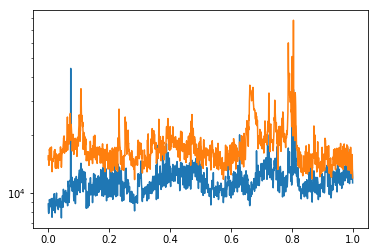

In [9]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/russiavsovietunion.csv'))
russia = np.asarray(time_series['Russia'])
sovietunion = np.asarray(time_series['Soviet Union'])
plt.plot(np.linspace(0,1,len(sovietunion)),sovietunion)
plt.plot(np.linspace(0,1,len(russia)),russia)
plt.yscale('log')

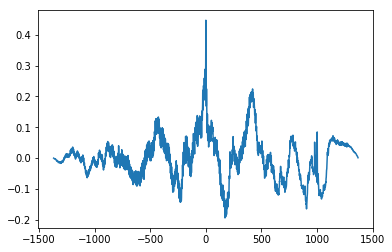

In [10]:
length = len(russia)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(russia,sovietunion))

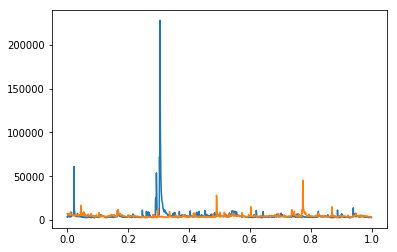

In [11]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/frankvrocky.csv'))
frank_ocean = np.asarray(time_series['Frank Ocean'])
asap_rocky = np.asarray(time_series['ASAP Rocky'])
plt.plot(np.linspace(0,1,len(frank_ocean)),frank_ocean)
plt.plot(np.linspace(0,1,len(asap_rocky)),asap_rocky)

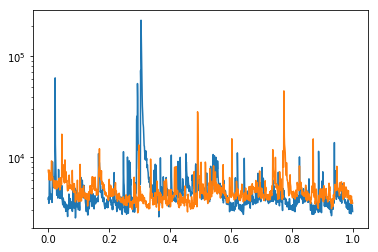

In [12]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/frankvrocky.csv'))
frank_ocean = np.asarray(time_series['Frank Ocean'])
asap_rocky = np.asarray(time_series['ASAP Rocky'])
plt.plot(np.linspace(0,1,len(frank_ocean)),frank_ocean)
plt.plot(np.linspace(0,1,len(asap_rocky)),asap_rocky)
plt.yscale('log')

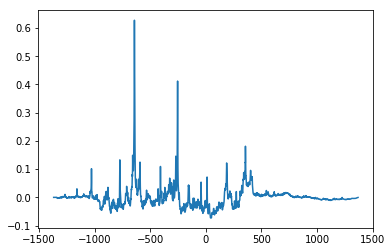

In [13]:
length = len(frank_ocean)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(frank_ocean,asap_rocky))

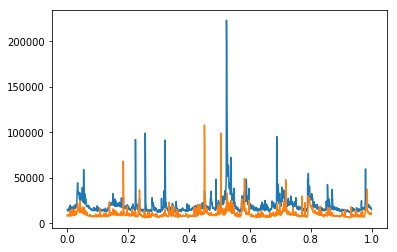

In [14]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/tupacvbiggie.csv'))
tupac = np.asarray(time_series['Tupac Shakur'])
biggie = np.asarray(time_series['The Notorious B.I.G.'])
plt.plot(np.linspace(0,1,len(tupac)),tupac)
plt.plot(np.linspace(0,1,len(biggie)),biggie)

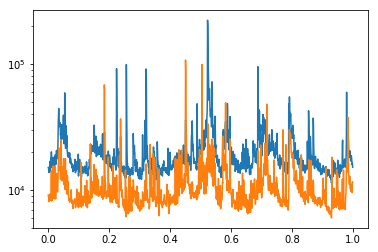

In [15]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/tupacvbiggie.csv'))
tupac = np.asarray(time_series['Tupac Shakur'])
biggie = np.asarray(time_series['The Notorious B.I.G.'])
plt.plot(np.linspace(0,1,len(tupac)),tupac)
plt.plot(np.linspace(0,1,len(biggie)),biggie)
plt.yscale('log')

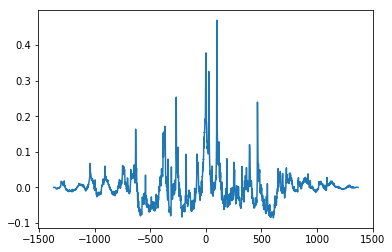

In [16]:
length = len(tupac)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(tupac,biggie))

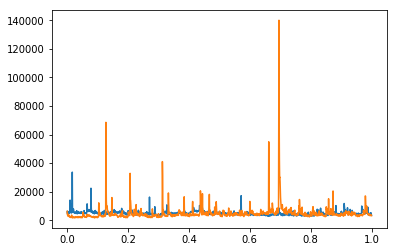

In [17]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/nasavspacex.csv'))
nasa = np.asarray(time_series['NASA'])
spacex = np.asarray(time_series['SpaceX'])
plt.plot(np.linspace(0,1,len(nasa)),nasa)
plt.plot(np.linspace(0,1,len(spacex)),spacex)

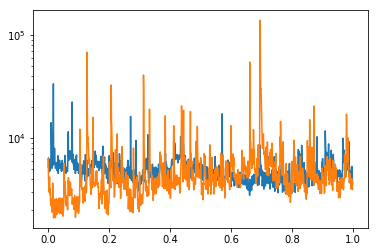

In [18]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/nasavspacex.csv'))
nasa = np.asarray(time_series['NASA'])
spacex = np.asarray(time_series['SpaceX'])
plt.plot(np.linspace(0,1,len(nasa)),nasa)
plt.plot(np.linspace(0,1,len(spacex)),spacex)
plt.yscale('log')

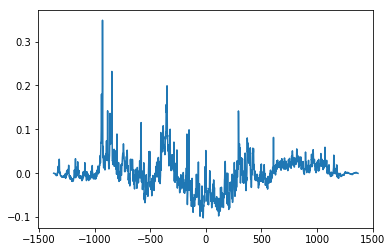

In [19]:
length = len(nasa)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(nasa,spacex))

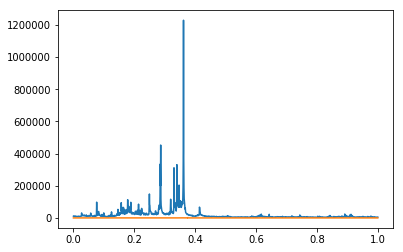

In [20]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvmainehs.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
mshs = np.asarray(time_series['Maine South High School'])
plt.plot(np.linspace(0,1,len(clinton)),clinton)
plt.plot(np.linspace(0,1,len(mshs)),mshs)

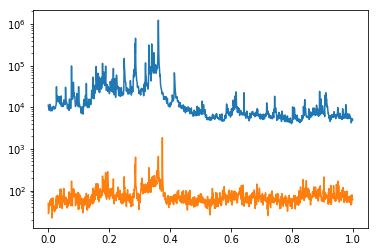

In [21]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvmainehs.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
mshs = np.asarray(time_series['Maine South High School'])
plt.plot(np.linspace(0,1,len(clinton)),clinton)
plt.plot(np.linspace(0,1,len(mshs)),mshs)
plt.yscale('log')

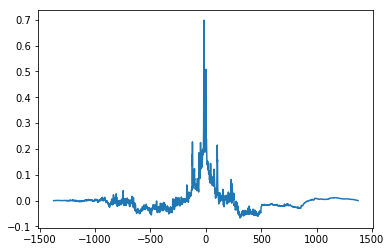

In [22]:
length = len(clinton)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(clinton,mshs))

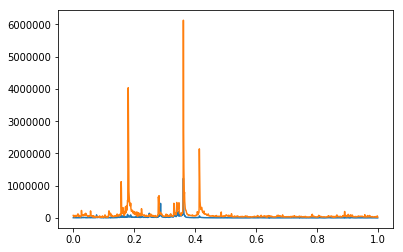

In [23]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvtrump.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
trump = np.asarray(time_series['Donald Trump'])
plt.plot(np.linspace(0,1,len(clinton)),clinton)
plt.plot(np.linspace(0,1,len(trump)),trump)

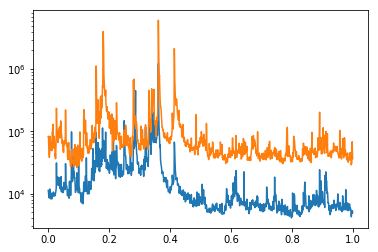

In [24]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvtrump.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
trump = np.asarray(time_series['Donald Trump'])
plt.plot(np.linspace(0,1,len(clinton)),clinton)
plt.plot(np.linspace(0,1,len(trump)),trump)
plt.yscale('log')

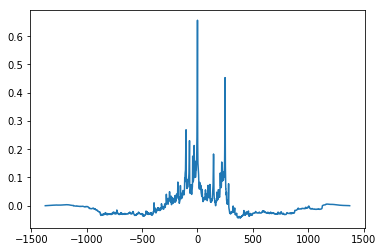

In [25]:
length = len(clinton)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(clinton,trump))

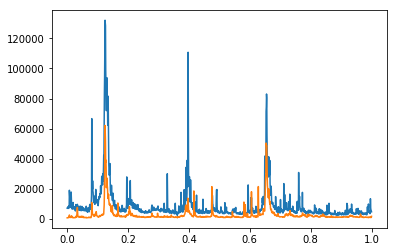

In [26]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/johnsonvhamill.csv'))
hamill = np.asarray(time_series['Mark Hamill'])
johnson = np.asarray(time_series['Rian Johnson'])
plt.plot(np.linspace(0,1,len(hamill)),hamill)
plt.plot(np.linspace(0,1,len(johnson)),johnson)

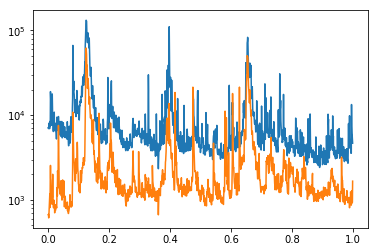

In [27]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/johnsonvhamill.csv'))
hamill = np.asarray(time_series['Mark Hamill'])
johnson = np.asarray(time_series['Rian Johnson'])
plt.plot(np.linspace(0,1,len(hamill)),hamill)
plt.plot(np.linspace(0,1,len(johnson)),johnson)
plt.yscale('log')

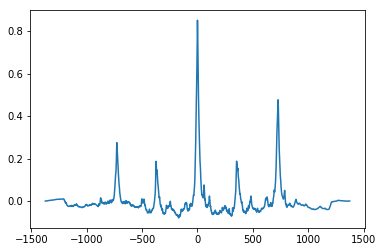

In [28]:
length = len(hamill)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(johnson,hamill))

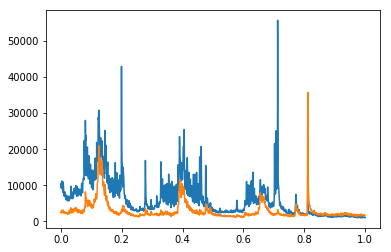

In [29]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/rebelsvclonewars.csv'))
rebels = np.asarray(time_series['Star Wars Rebels'])
clonewars = np.asarray(time_series['Star Wars: The Clone Wars (2008 TV series)'])
plt.plot(np.linspace(0,1,len(rebels)),rebels)
plt.plot(np.linspace(0,1,len(clonewars)),clonewars)

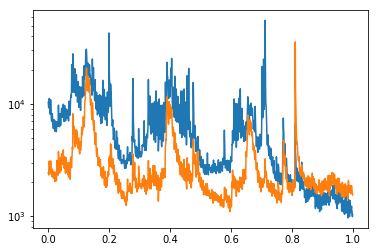

In [30]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/rebelsvclonewars.csv'))
rebels = np.asarray(time_series['Star Wars Rebels'])
clonewars = np.asarray(time_series['Star Wars: The Clone Wars (2008 TV series)'])
plt.plot(np.linspace(0,1,len(rebels)),rebels)
plt.plot(np.linspace(0,1,len(clonewars)),clonewars)
plt.yscale('log')

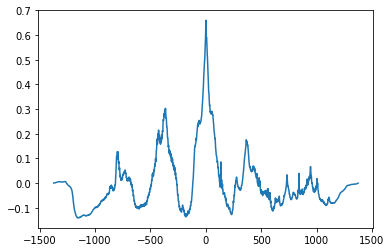

In [31]:
length = len(clonewars)
t = np.arange(-length+1,length)
plt.plot(t,crosscorr(clonewars,rebels))

In [41]:
def bootstrapcchslag0(nboot,delta,X,Y):
    cchs = []
    splits = len(bitcoin)/delta 
    if len(X) % delta != 0:
        X = X[:-1*(len(X)%delta)]
        Y = Y[:-1*(len(Y)%delta)]
    for i in range(nboot):
        lambdas1 = np.mean(np.vstack(np.hsplit(X,int(splits))),axis=1)
        rand_ts1 = np.hstack(np.random.poisson(lambdas1,(delta,len(lambdas1))).T)
        lambdas2 = np.mean(np.vstack(np.hsplit(Y,int(splits))),axis=1)
        rand_ts2 = np.hstack(np.random.poisson(lambdas2,(delta,len(lambdas2))).T) #(n,2) samples for 2 length parameter vector
        cchs.append(fftcrosscorr(rand_ts1,rand_ts2)[len(X)-1])
    return cchs #,rand_ts1,rand_ts2

In [124]:
len(bitcoin) % 124 # optimal bin size/delta = 124 ??

5

In [33]:
start = time()

cchs = np.array(bootstrapcchslag0(10000,124,bitcoin,blockchain))
end = time()
end-start

10.925249576568604

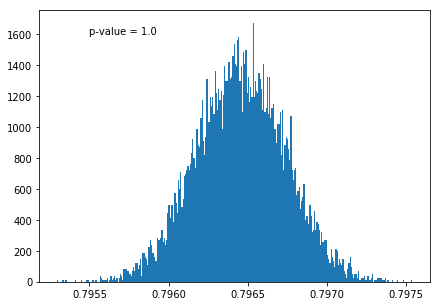

In [34]:
fig, ax = plt.subplots(1,figsize=(7,5)) # prepares the figure

plt.hist(cchs,density=True,bins=300);
cch_original = crosscorr(bitcoin,blockchain)[len(bitcoin)-1]
p_value = np.sum(cchs>=cch_original)/10000
textstr = 'p-value = {}'.format(p_value)
plt.text(0.7955, 1600, textstr);
#plt.axvline(x=cch_original) don't plot this; line will be all the way to the left

In [35]:
fftcrosscorr(bitcoin,blockchain)[len(bitcoin)-1]

0.6326204600974202

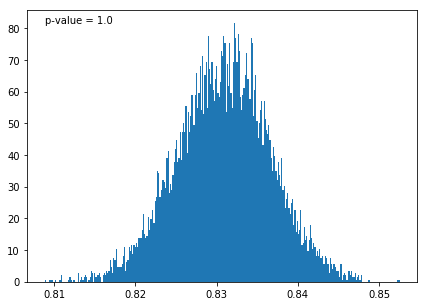

In [38]:
cchs = np.array(bootstrapcchslag0(10000,124,clinton,mshs))
fig, ax = plt.subplots(1,figsize=(7,5)) 

n,_,_ = plt.hist(cchs,density=True,bins=300);
cch_original = crosscorr(clinton,mshs)[len(clinton)-1]
p_value = np.sum(cchs>=cch_original)/10000
textstr = 'p-value = {}'.format(p_value)
plt.text(np.min(cchs), np.max(n) , textstr);

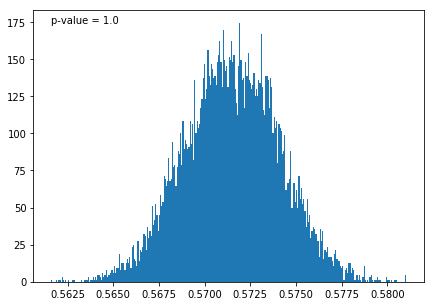

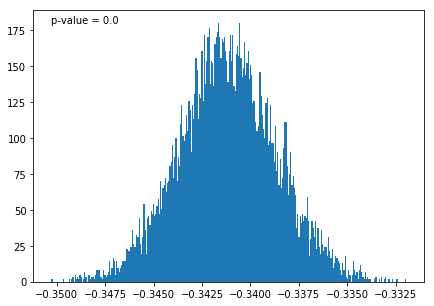

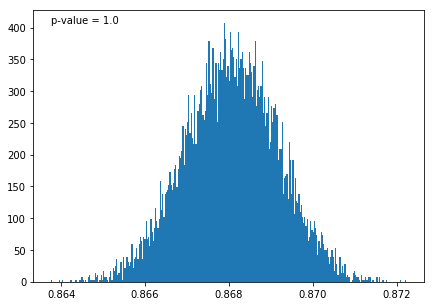

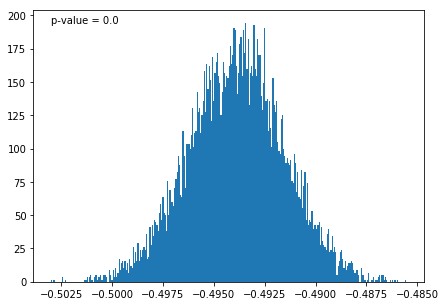

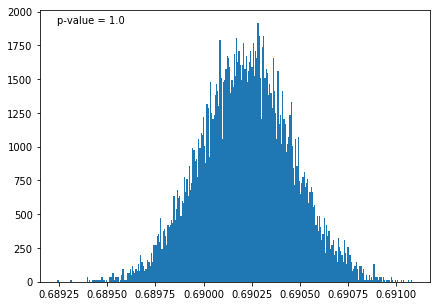

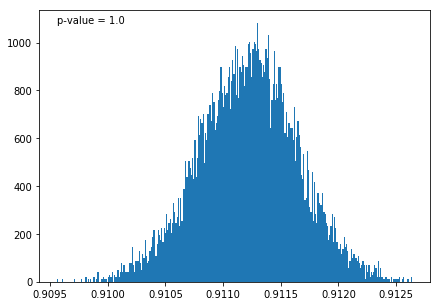

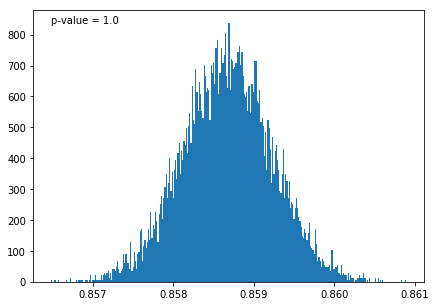

In [40]:
for i,j in [(russia,sovietunion),(frank_ocean,asap_rocky),(tupac,biggie),(nasa,spacex),(clinton,trump),(hamill,johnson),(clonewars,rebels)]:
    cchs = np.array(bootstrapcchslag0(10000,,i,j))
    fig, ax = plt.subplots(1,figsize=(7,5)) # prepares the figure

    n,_,_ = plt.hist(cchs,density=True,bins=300);
    cch_original = crosscorr(i,j)[len(i)-1]
    p_value = np.sum(cchs>=cch_original)/10000
    textstr = 'p-value = {}'.format(p_value)
    plt.text(np.min(cchs), np.max(n) , textstr);

In [ ]:
# roc curves 1 - type ii error inject synchrony 